#### Based of
https://github.com/dataforgoodfr/Bloom/blob/data-science/data_science/notebooks/20230212_bloom_exploration_mathilde.ipynb

## Importing packages

In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

## Path to raw shapefiles

See https://data-for-good.slack.com/archives/C04MVJS7E3Z/p1676215360408939 to download the raw shapefiles:
"Télécharger le dataset de toutes les aires protégées (plutôt grossier) 
ici https://www.dropbox.com/sh/dxdfs3x4b7xqa6b/AADIWUOA5Vc9HhM7leV2d6gla?dl=1 (5.5Go) 
pour les catégoriser, filtrer et visualiser"

In [2]:
path_root = '/Users/martinvanderlinden/Documents/raw_data/WDPA_jan2023/'

In [3]:
## read shapefile using geopandas library

In [4]:
def shp_file_to_df(path_root: str, folder: str, file_name: str) -> pd.DataFrame:
    
    full_path = path_root + folder + '/'+ file_name
    
    df = gpd.GeoDataFrame.from_file(full_path)
    
    return df

## Get the polygons

### 1. Polygons_1

In [5]:
%%time
df1 = shp_file_to_df(path_root, 'WDPA_Jan2023_Public_shp_0', 'WDPA_Jan2023_Public_shp-polygons.shp')

CPU times: user 24.8 s, sys: 2.48 s, total: 27.3 s
Wall time: 31.5 s


### 2. Polygons_2

In [6]:
%%time
df2 = shp_file_to_df(path_root,'WDPA_Jan2023_Public_shp_1','WDPA_Jan2023_Public_shp-polygons.shp')

CPU times: user 30.8 s, sys: 2.55 s, total: 33.3 s
Wall time: 37.4 s


### 3. Polygons_3

In [7]:
%%time
df3 = shp_file_to_df(path_root,'WDPA_Jan2023_Public_shp_2','WDPA_Jan2023_Public_shp-polygons.shp')

CPU times: user 35.6 s, sys: 5.55 s, total: 41.1 s
Wall time: 57.1 s


## Concat & inspect

In [8]:
df = pd.concat([df1, df2, df3])

In [9]:
#there were several index = 0, 1, 2 etc... so reset index is needed
df.reset_index(inplace=True)
df.shape

(273261, 32)

In [10]:
#check which info we have
df.columns

Index(['index', 'WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'geometry'],
      dtype='object')

Many of the included polygons are for in-land protected areas.

See quick overview of included area, e.g., from front-cover of the User Manual (https://www.ibat-alliance.org/pdf/wdpa_manual.pdf) or directly from https://www.dropbox.com/s/bqiuqfvkh87ddgq/Screen%20Shot%202023-02-12%20at%209.54.58%20PM.png?dl=1

From pg. 36 of "User Manual for the World Database on Protected Areas and world database on other effective area- based conservation measures: 1.6" (https://www.ibat-alliance.org/pdf/wdpa_manual.pdf):

> "Marine Protected Areas

> The ‘Marine’ field provides an indication of whether a protected area or OECM is located entirely or partially in > the marine environment.
> A value of
> * ‘0’ indicates that there is very little to no marine component,
> * ‘1’ indicates > that the site has substantial marine and terrestrial components and
> * ’2’ indicates that there is very little to no > terrestrial component."

In [11]:
df['MARINE']

0         2
1         2
2         0
3         0
4         0
         ..
273256    0
273257    0
273258    0
273259    0
273260    0
Name: MARINE, Length: 273261, dtype: object

# Filter for `MARINE != 0` only and export

In [12]:
df_nonterr = df[df.MARINE != '0']

In [13]:
print(f"{df.shape[0]} vs {df_nonterr.shape[0]}")

273261 vs 18019


In [15]:
df_nonterr.to_file('./Nonterrestrial_WDPA_Jan2023')

<Axes: >

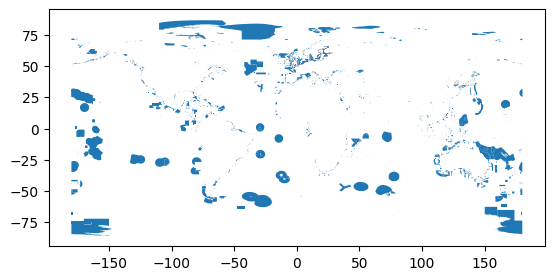

In [ ]:
df_nonterr.plot()